# Preparation

In [13]:
#dataload
from data_utils import load_CIFAR_batch,load_CIFAR10,get_CIFAR10_data
import sys
sys.path += ['layers']
import numpy as np
from init_layers import init_layers
from init_model import init_model
from train import train 
from test import test
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
X_train, y_train, X_test, y_test = get_CIFAR10_data()

Train data shape:  (32, 32, 3, 50000)
Train labels shape:  (50000,)
Test data shape:  (32, 32, 3, 10000)
Test labels shape:  (10000,)


# Model 1

CONV(2, 3, 2)

POOL(2, 2)

RELU

FLATTEN

LINEAR(450, 10)

SOFTMAX

In [15]:
l1 = [init_layers('conv', {'filter_size': 2,
                        'filter_depth': 3,
                        'num_filters': 2}),
    init_layers('pool', {'filter_size': 2,
                        'stride': 2}),
    init_layers('relu', {}),
    init_layers('flatten', {}),
    init_layers('linear', {'num_in': 450,
                            'num_out': 10}),
    init_layers('softmax', {})]

model1 = init_model(l1, [32, 32, 3], 10, True)

Input size:
[32, 32, 3]
Layer 0 output size: 
(31, 31, 2)
Layer 1 output size: 
(15, 15, 2)
Layer 2 output size: 
(15, 15, 2)
Layer 3 output size: 
(450,)
Layer 4 output size: 
(10,)
Final output size:
(10,)
Provided output size (should match above):
10
(Batch dimension not included)


## Parameter Set 1

Learning Rate: 1e-2

Weight Decay: 1e-3

Batch Size: 128

In [19]:
params =  {"learning_rate":1e-2,
            "weight_decay":1e-3,
            "batch_size":128,
            "save_file":'model1_p1.npz',
            "print_step" : 10}

model_result, train_accuracy, train_loss = train(model1, X_train, y_train, params, numIters=1000)

Iteration:  0 	Accuracy:  0.09375 	Loss:  2.3447625591435366
Iteration:  10 	Accuracy:  0.078125 	Loss:  2.303552179418999
Iteration:  20 	Accuracy:  0.1484375 	Loss:  2.2776157750112827
Iteration:  30 	Accuracy:  0.1796875 	Loss:  2.2451673155099883
Iteration:  40 	Accuracy:  0.125 	Loss:  2.215172360668074
Iteration:  50 	Accuracy:  0.2265625 	Loss:  2.008970746433801
Iteration:  60 	Accuracy:  0.2265625 	Loss:  2.055131393104146
Iteration:  70 	Accuracy:  0.3125 	Loss:  2.012796227294503
Iteration:  80 	Accuracy:  0.15625 	Loss:  2.4341415496052696
Iteration:  90 	Accuracy:  0.2734375 	Loss:  2.0936404628393213


0.2421875 1.9978944936726575


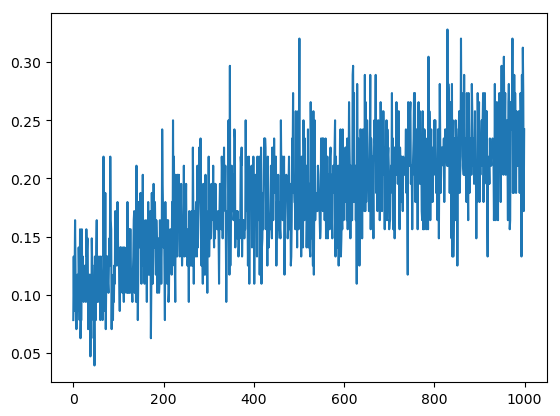

In [ ]:
plt.plot(range(1000), train_accuracy, label='Accuracy')
plt.show()

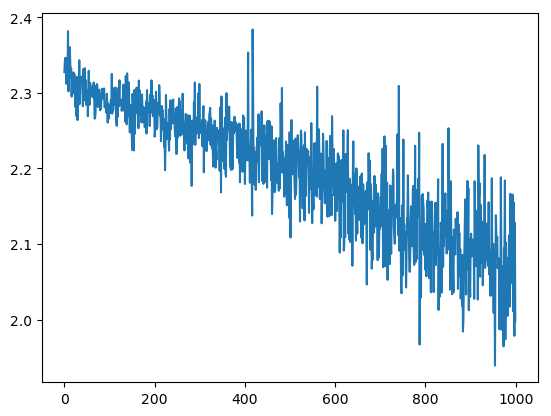

In [ ]:
plt.plot(range(1000), train_loss, label='Loss')
plt.show()

In [ ]:
test_accuracy, test_loss = test(model_result, X_test, y_test)
print(test_accuracy, test_loss)

0.2299 2.071762657895321


## Parameter Set 2

Learning Rate: 1e-2

Weight Decay: 1e-2

Batch Size: 128

In [ ]:
params =  {"learning_rate":1e-2,
            "weight_decay":1e-2,
            "batch_size":128,
            "save_file":'model1_p2.npz',
            "print_step" : 10}

model_result, train_accuracy, train_loss = train(model1, X_train, y_train, params, numIters=1000)

Iteration:  0 	Accuracy:  0.1953125 	Loss:  2.175030838814415
Iteration:  10 	Accuracy:  0.2265625 	Loss:  2.171351559966434
Iteration:  20 	Accuracy:  0.1875 	Loss:  2.21337928947808
Iteration:  30 	Accuracy:  0.1953125 	Loss:  2.1669099448622333
Iteration:  40 	Accuracy:  0.2265625 	Loss:  2.1657772990285893
Iteration:  50 	Accuracy:  0.2109375 	Loss:  2.149735604842978
Iteration:  60 	Accuracy:  0.1953125 	Loss:  2.1376020061908245
Iteration:  70 	Accuracy:  0.171875 	Loss:  2.158093387559853
Iteration:  80 	Accuracy:  0.1171875 	Loss:  2.2044473403233487
Iteration:  90 	Accuracy:  0.171875 	Loss:  2.2123342754068602


SystemError: PyEval_EvalFrameEx returned a result with an error set

0.2421875 1.9978944936726575


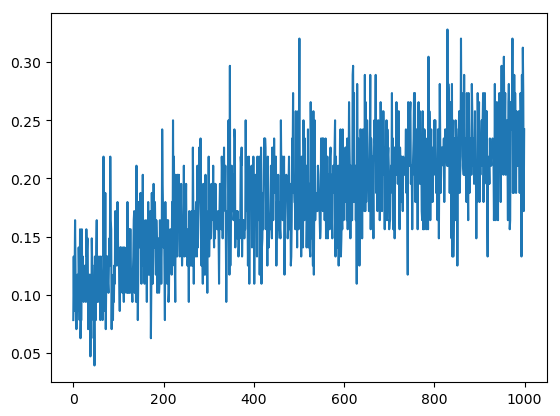

In [ ]:
plt.plot(range(1000), train_accuracy, label='Accuracy')
plt.show()

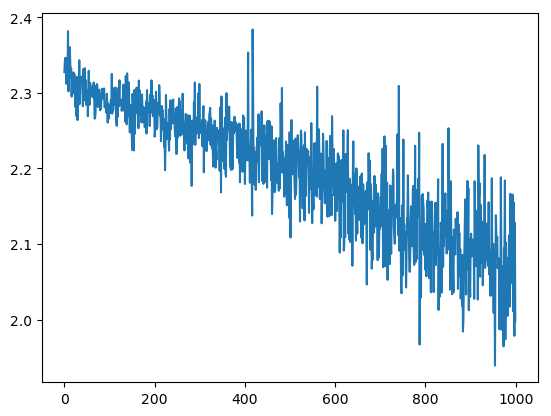

In [ ]:
plt.plot(range(1000), train_loss, label='Loss')
plt.show()

In [ ]:
test_accuracy, test_loss = test(model_result,X_test,y_test)
print(test_accuracy, test_loss)

0.1417 2.2055576022981005


# Model 2

CONV(2, 3, 2)

POOL(2, 2)

RELU

CONV(2, 2, 2)

POOL(2, 2)

RELU

FLATTEN

LINEAR(450, 10)

SOFTMAX

In [ ]:
l2 = [init_layers('conv', {'filter_size': 2,
                        'filter_depth': 3,
                        'num_filters': 2}),
    init_layers('pool', {'filter_size': 2,
                        'stride': 2}),
    init_layers('relu', {}),
    init_layers('conv', {'filter_size': 2,
                        'filter_depth': 2,
                        'num_filters': 6}),
    init_layers('pool', {'filter_size': 2,
                        'stride': 2}),
    init_layers('relu', {}),
    init_layers('flatten', {}),
    init_layers('linear', {'num_in': 294,
                            'num_out': 10}),
    init_layers('softmax', {})]

model2 = init_model(l2, [32, 32, 3], 10, True)

Input size:
[32, 32, 3]
Layer 0 output size: 
(31, 31, 2)
Layer 1 output size: 
(15, 15, 2)
Layer 2 output size: 
(15, 15, 2)
Layer 3 output size: 
(14, 14, 6)
Layer 4 output size: 
(7, 7, 6)
Layer 5 output size: 
(7, 7, 6)
Layer 6 output size: 
(294,)
Layer 7 output size: 
(10,)
Final output size:
(10,)
Provided output size (should match above):
10
(Batch dimension not included)


## Parameter Set 1

Learning Rate: 1e-2

Weight Decay: 1e-3

Batch Size: 128

In [ ]:
params =  {"learning_rate":1e-2,
            "weight_decay":1e-3,
            "batch_size":128,
            "save_file":'model2_p1.npz',
            "print_step" : 10}
#train
model_result,accuracy,loss = train(model2, X_train, y_train, params, numIters=1000)

Iteration:  0 	Accuracy:  0.0859375 	Loss:  2.325217542291922
Iteration:  10 	Accuracy:  0.15625 	Loss:  2.297406881304877
Iteration:  20 	Accuracy:  0.09375 	Loss:  2.305180411162228
Iteration:  30 	Accuracy:  0.0859375 	Loss:  2.3023117303909357
Iteration:  40 	Accuracy:  0.140625 	Loss:  2.290824923825886
Iteration:  50 	Accuracy:  0.0625 	Loss:  2.3090712419275645
Iteration:  60 	Accuracy:  0.078125 	Loss:  2.3012731146574836
Iteration:  70 	Accuracy:  0.078125 	Loss:  2.3043292903396613
Iteration:  80 	Accuracy:  0.0859375 	Loss:  2.305009179623003
Iteration:  90 	Accuracy:  0.09375 	Loss:  2.3057786263862408
Iteration:  100 	Accuracy:  0.109375 	Loss:  2.296488726223779
Iteration:  110 	Accuracy:  0.125 	Loss:  2.3090436823966707
Iteration:  120 	Accuracy:  0.0859375 	Loss:  2.2999196938232043
Iteration:  130 	Accuracy:  0.171875 	Loss:  2.290778865376743
Iteration:  140 	Accuracy:  0.125 	Loss:  2.2915573057096177
Iteration:  150 	Accuracy:  0.125 	Loss:  2.2961007468811103
Iter

KeyboardInterrupt: 

In [ ]:
accuracy,loss = test(model_result,X_test,y_test)
print(accuracy, loss)

## Parameter Set 2

Learning Rate: 1e-2

Weight Decay: 1e-2

Batch Size: 128

In [ ]:
params =  {"learning_rate":1e-2,
            "weight_decay":1e-2,
            "batch_size":128,
            "save_file":'model2_p2.npz',
            "print_step" : 10}
#train
model_result,accuracy,loss = train(model2, X_train, y_train, params, numIters=1000)

Iteration:  0 	Accuracy:  0.1015625 	Loss:  2.2624745850943735
Iteration:  10 	Accuracy:  0.203125 	Loss:  2.1755950691295665
Iteration:  20 	Accuracy:  0.15625 	Loss:  2.2451744588393776
Iteration:  30 	Accuracy:  0.1953125 	Loss:  2.2184500419885214
Iteration:  40 	Accuracy:  0.1484375 	Loss:  2.2218123630014563
Iteration:  50 	Accuracy:  0.1015625 	Loss:  2.2315801046945998
Iteration:  60 	Accuracy:  0.140625 	Loss:  2.2279121776955995
Iteration:  70 	Accuracy:  0.125 	Loss:  2.227709271327707
Iteration:  80 	Accuracy:  0.0859375 	Loss:  2.2472279809828724
Iteration:  90 	Accuracy:  0.1484375 	Loss:  2.233424655593227
Iteration:  100 	Accuracy:  0.0546875 	Loss:  2.2830182086593362
Iteration:  110 	Accuracy:  0.1171875 	Loss:  2.220126425182338
Iteration:  120 	Accuracy:  0.171875 	Loss:  2.2086354922481917
Iteration:  130 	Accuracy:  0.1328125 	Loss:  2.2227313116097545
Iteration:  140 	Accuracy:  0.1640625 	Loss:  2.2505817341024112
Iteration:  150 	Accuracy:  0.125 	Loss:  2.2082

In [ ]:
accuracy,loss = test(model_result,X_test,y_test)
print(accuracy, loss)

0.1417 2.2055576022981005
